<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-06-10 17:00:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.2’

survey-data.csv.2   100%[===================>] 152.13M  56.2MB/s    in 2.7s    

2025-06-10 17:01:02 (56.2 MB/s) - ‘survey-data.csv.2’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 176.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 188.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 137.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 140.7 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


COUNT(*)
0     65437

## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


Table_Name
0       main

## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568

## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


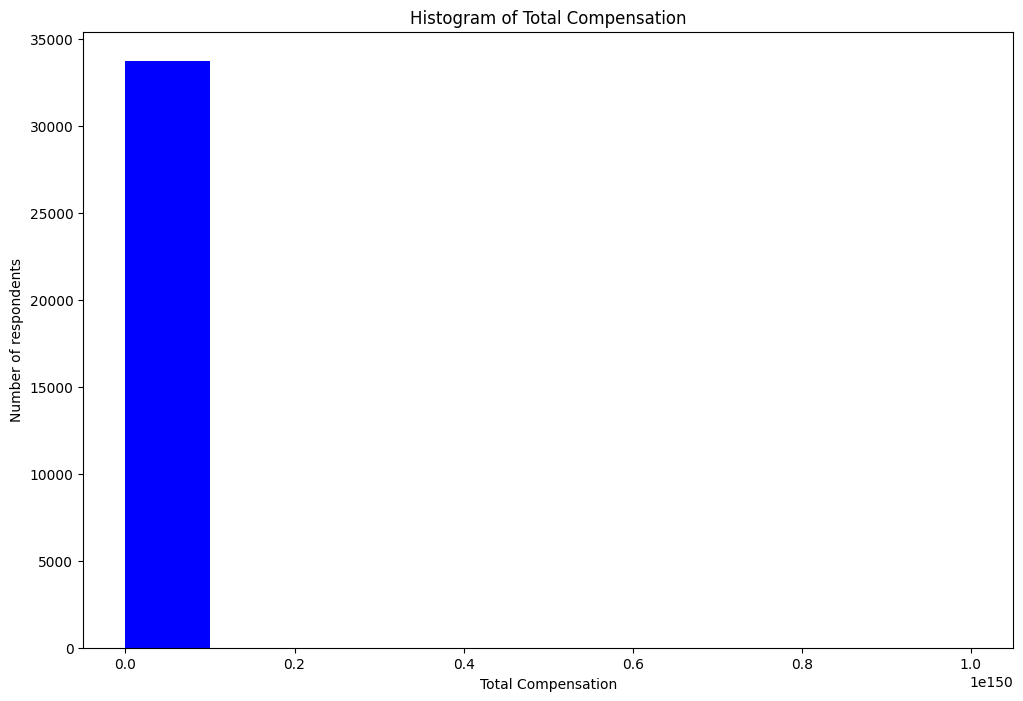

In [10]:
## Write your code here

QUERY = """ SELECT CompTotal FROM main """

df_CompTotal = pd.read_sql_query(QUERY, conn)
df_CompTotal.dropna(inplace=True)

plt.figure(figsize=(12,8))
plt.hist(df_CompTotal, bins=10, color='blue')
plt.title("Histogram of Total Compensation")
plt.xlabel("Total Compensation")
plt.ylabel("Number of respondents")
plt.show()

**Box Plots**

Plot a box plot of Age.


/tmp/ipykernel_300/2378405799.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Age_numeric = df_Age.replace(age_replacemnet)


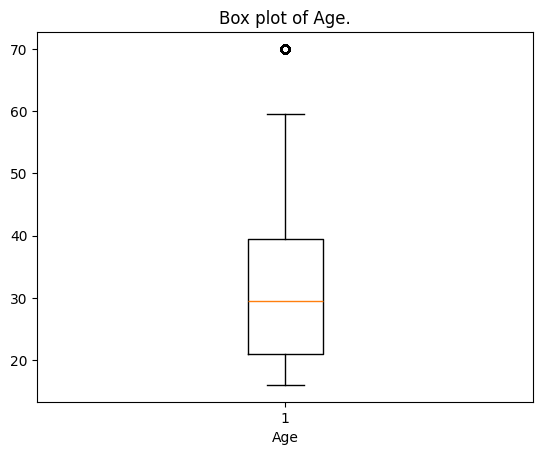

Age    float64
dtype: object

In [28]:
## Write your code here
QUERY = """ SELECT Age FROM main"""

df_Age = pd.read_sql_query(QUERY, conn)
age_replacemnet = {'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
     'Prefer not to say': None}
df_Age_numeric = df_Age.replace(age_replacemnet)

df_Age = df_Age_numeric.astype('float')
df_Age.dropna(inplace=True)


plt.boxplot(df_Age)
plt.title("Box plot of Age.")
plt.xlabel("Age")
plt.show()
df_Age.dtypes

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


/tmp/ipykernel_300/1766637081.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_AW['Age']= df_AW['Age'].replace(age_replacemnet).astype('float')


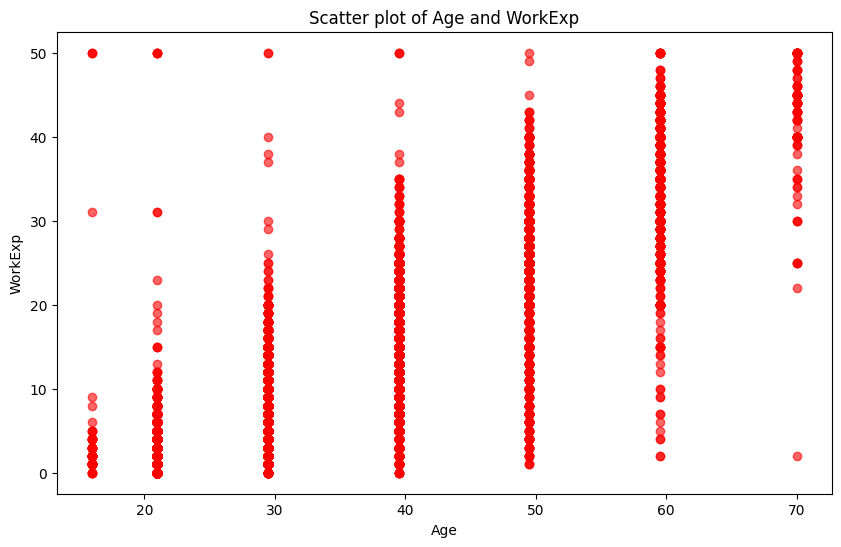

In [36]:
## Write your code here

QUERY = """ SELECT Age, WorkExp FROM main """
df_AW = pd.read_sql_query(QUERY, conn)

#Convert Age to numeric
age_replacemnet = {'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
     'Prefer not to say': None}

df_AW['Age']= df_AW['Age'].replace(age_replacemnet).astype('float')
df_AW = df_AW.dropna()

plt.figure(figsize=(10,6))
plt.scatter(df_AW['Age'], df_AW['WorkExp'], alpha=0.6, color='red')
plt.title('Scatter plot of Age and WorkExp')
plt.xlabel("Age")
plt.ylabel("WorkExp")
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


/tmp/ipykernel_300/2326134995.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_TFA['Age'] = df_TFA['Age'].replace(age_replacemnet).astype('float')


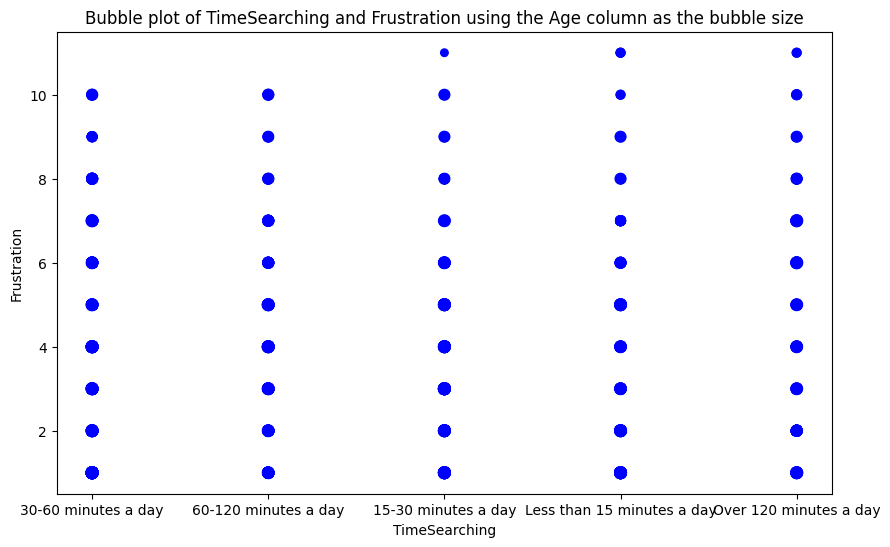

In [42]:
## Write your code here
QUERY = """ SELECT TimeSearching, Frustration, Age FROM main """
df_TFA = pd.read_sql_query(QUERY, conn)

#Convert Age to numeric
age_replacemnet = {'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
     'Prefer not to say': None}

df_TFA['Age'] = df_TFA['Age'].replace(age_replacemnet).astype('float')
df_TFA.dropna(inplace=True)
bubble_size = df_TFA['Age']

# lets transform Frustration to numeric data
#Each entry becomes a numeric value equal to the number of frustrations mentioned.
df_TFA['FrustrationCount'] = df_TFA['Frustration'].apply(lambda x: len(x.split(';')) if pd.notna(x) else 0)

plt.figure(figsize=(10, 6))
plt.scatter(df_TFA['TimeSearching'], df_TFA['FrustrationCount'], s=bubble_size, color='blue')
plt.title("Bubble plot of TimeSearching and Frustration using the Age column as the bubble size")
plt.xlabel('TimeSearching')
plt.ylabel('Frustration')
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


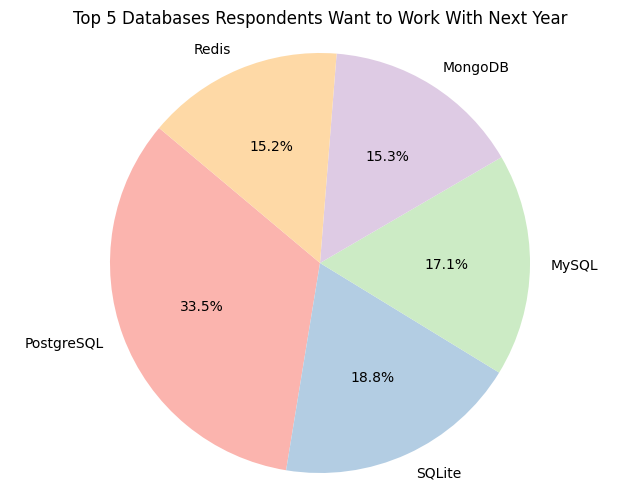

In [60]:
## Write your code here
QUERY = """ SELECT DatabaseWantToWorkWith FROM main """
df_Dww = pd.read_sql_query(QUERY, conn)
df_Dww = df_Dww.dropna()

df_Dww['DatabaseList'] = df_Dww['DatabaseWantToWorkWith'].str.split(';')

# Explode into one database per row
df_exploded = df_Dww.explode('DatabaseList')

# the five top databses
databaseCount_top5 = df_exploded['DatabaseList'].value_counts().nlargest(5)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    databaseCount_top5,
    labels=databaseCount_top5.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors[:5]
)
plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.axis('equal')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


/tmp/ipykernel_300/2678332495.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeNumeric'] = df['Age'].replace(age_replacements)


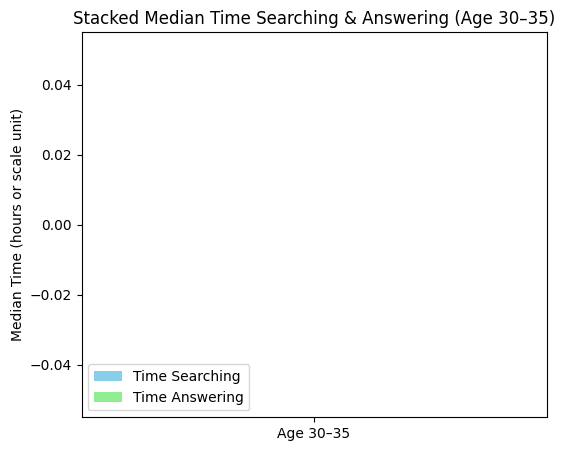

In [69]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

QUERY = """ SELECT TimeSearching, TimeAnswering, Age FROM main"""

df = pd.read_sql_query(QUERY, conn)
df = df.dropna()

age_replacements = {'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
     'Prefer not to say': None}

df['AgeNumeric'] = df['Age'].replace(age_replacements)
#  Ensure Age column is numeric
df['AgeNumeric'] = pd.to_numeric(df['AgeNumeric'], errors='coerce')

# Filter age group 30–35
age_group_df = df[(df['AgeNumeric'] >= 30) & (df['AgeNumeric'] <= 35)]

# Calculate medians
median_time_searching = age_group_df['TimeSearching'].median()
median_time_answering = age_group_df['TimeAnswering'].median()

#  Prepare data for stacked bar plot
labels = ['Age 30–35']
searching = [median_time_searching]
answering = [median_time_answering]

#  Plot
plt.figure(figsize=(6, 5))
plt.bar(labels, searching, label='Time Searching', color='skyblue')
plt.bar(labels, answering, bottom=searching, label='Time Answering', color='lightgreen')

plt.ylabel('Median Time (hours or scale unit)')
plt.title('Stacked Median Time Searching & Answering (Age 30–35)')
plt.legend()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


/tmp/ipykernel_300/2653787356.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeNumeric'] = df['Age'].replace(age_replacements)


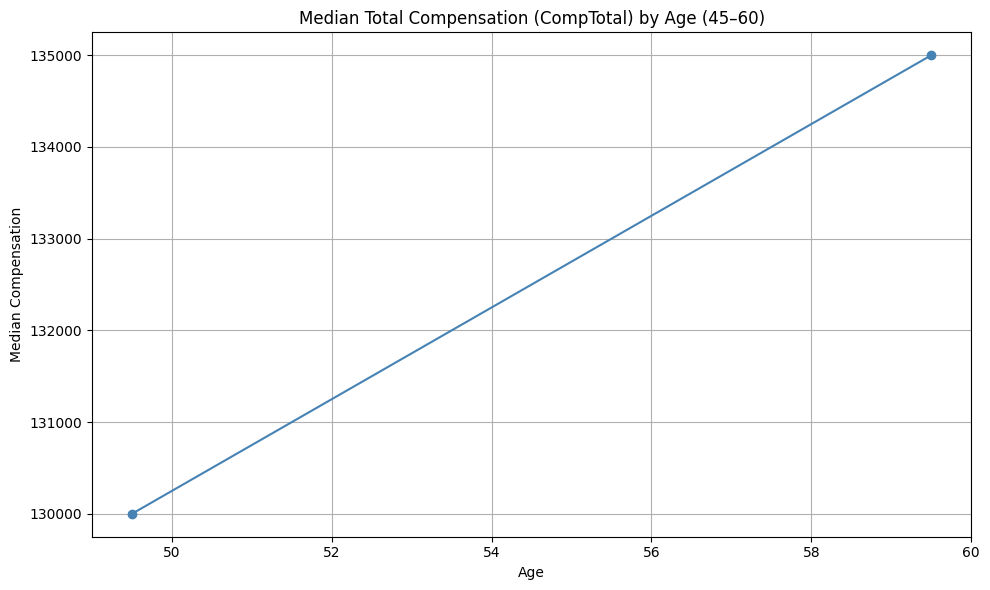

In [70]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

QUERY = """ SELECT CompTotal, Age FROM main"""

df = pd.read_sql_query(QUERY, conn)
df = df.dropna()

age_replacements = {'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
     'Prefer not to say': None}

df['AgeNumeric'] = df['Age'].replace(age_replacements)

# Convert Age to numeric (if not already)
df['AgeNumeric'] = pd.to_numeric(df['AgeNumeric'], errors='coerce')

#  Filter for ages 45 to 60
df_filtered = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]

#  Group by Age and calculate median CompTotal
median_comp_by_age = df_filtered.groupby('AgeNumeric')['CompTotal'].median()

# Plot as a line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age.index, median_comp_by_age.values, marker='o', linestyle='-', color='steelblue')
plt.title('Median Total Compensation (CompTotal) by Age (45–60)')
plt.xlabel('Age')
plt.ylabel('Median Compensation')
plt.grid(True)
plt.tight_layout()
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


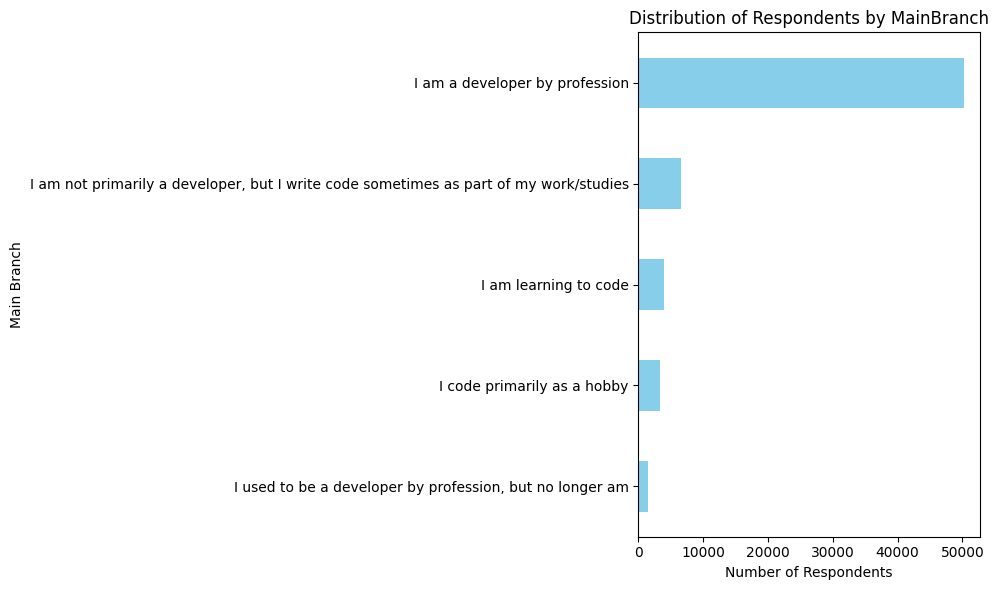

In [71]:
## Write your code here

QUERY = """ SELECT MainBranch FROM main"""

df = pd.read_sql_query(QUERY, conn)

# Drop missing values in MainBranch
main_branch_counts = df['MainBranch'].dropna().value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Respondents by MainBranch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.gca().invert_yaxis()  # Most common at the top
plt.tight_layout()
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
